# (Chain Rule)

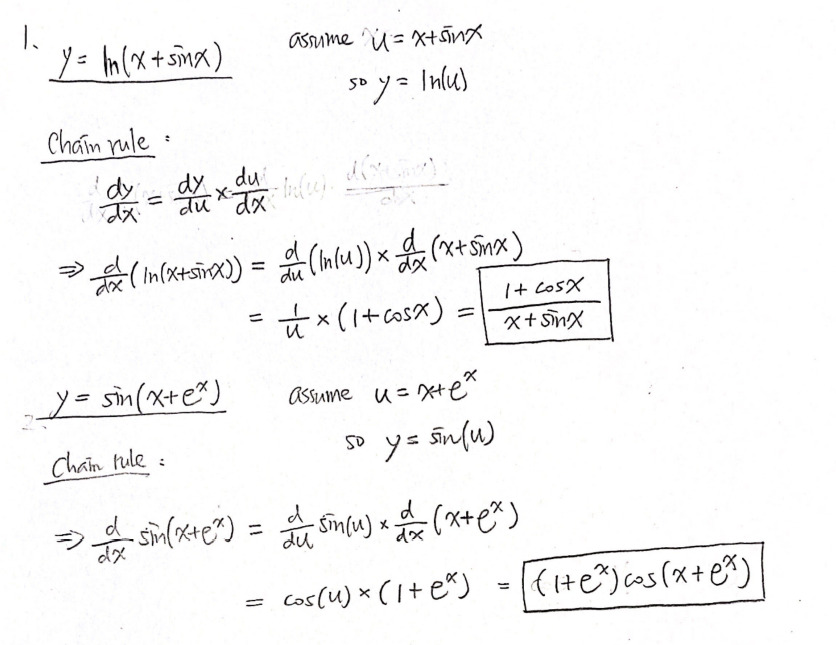

# (Backpropagation)

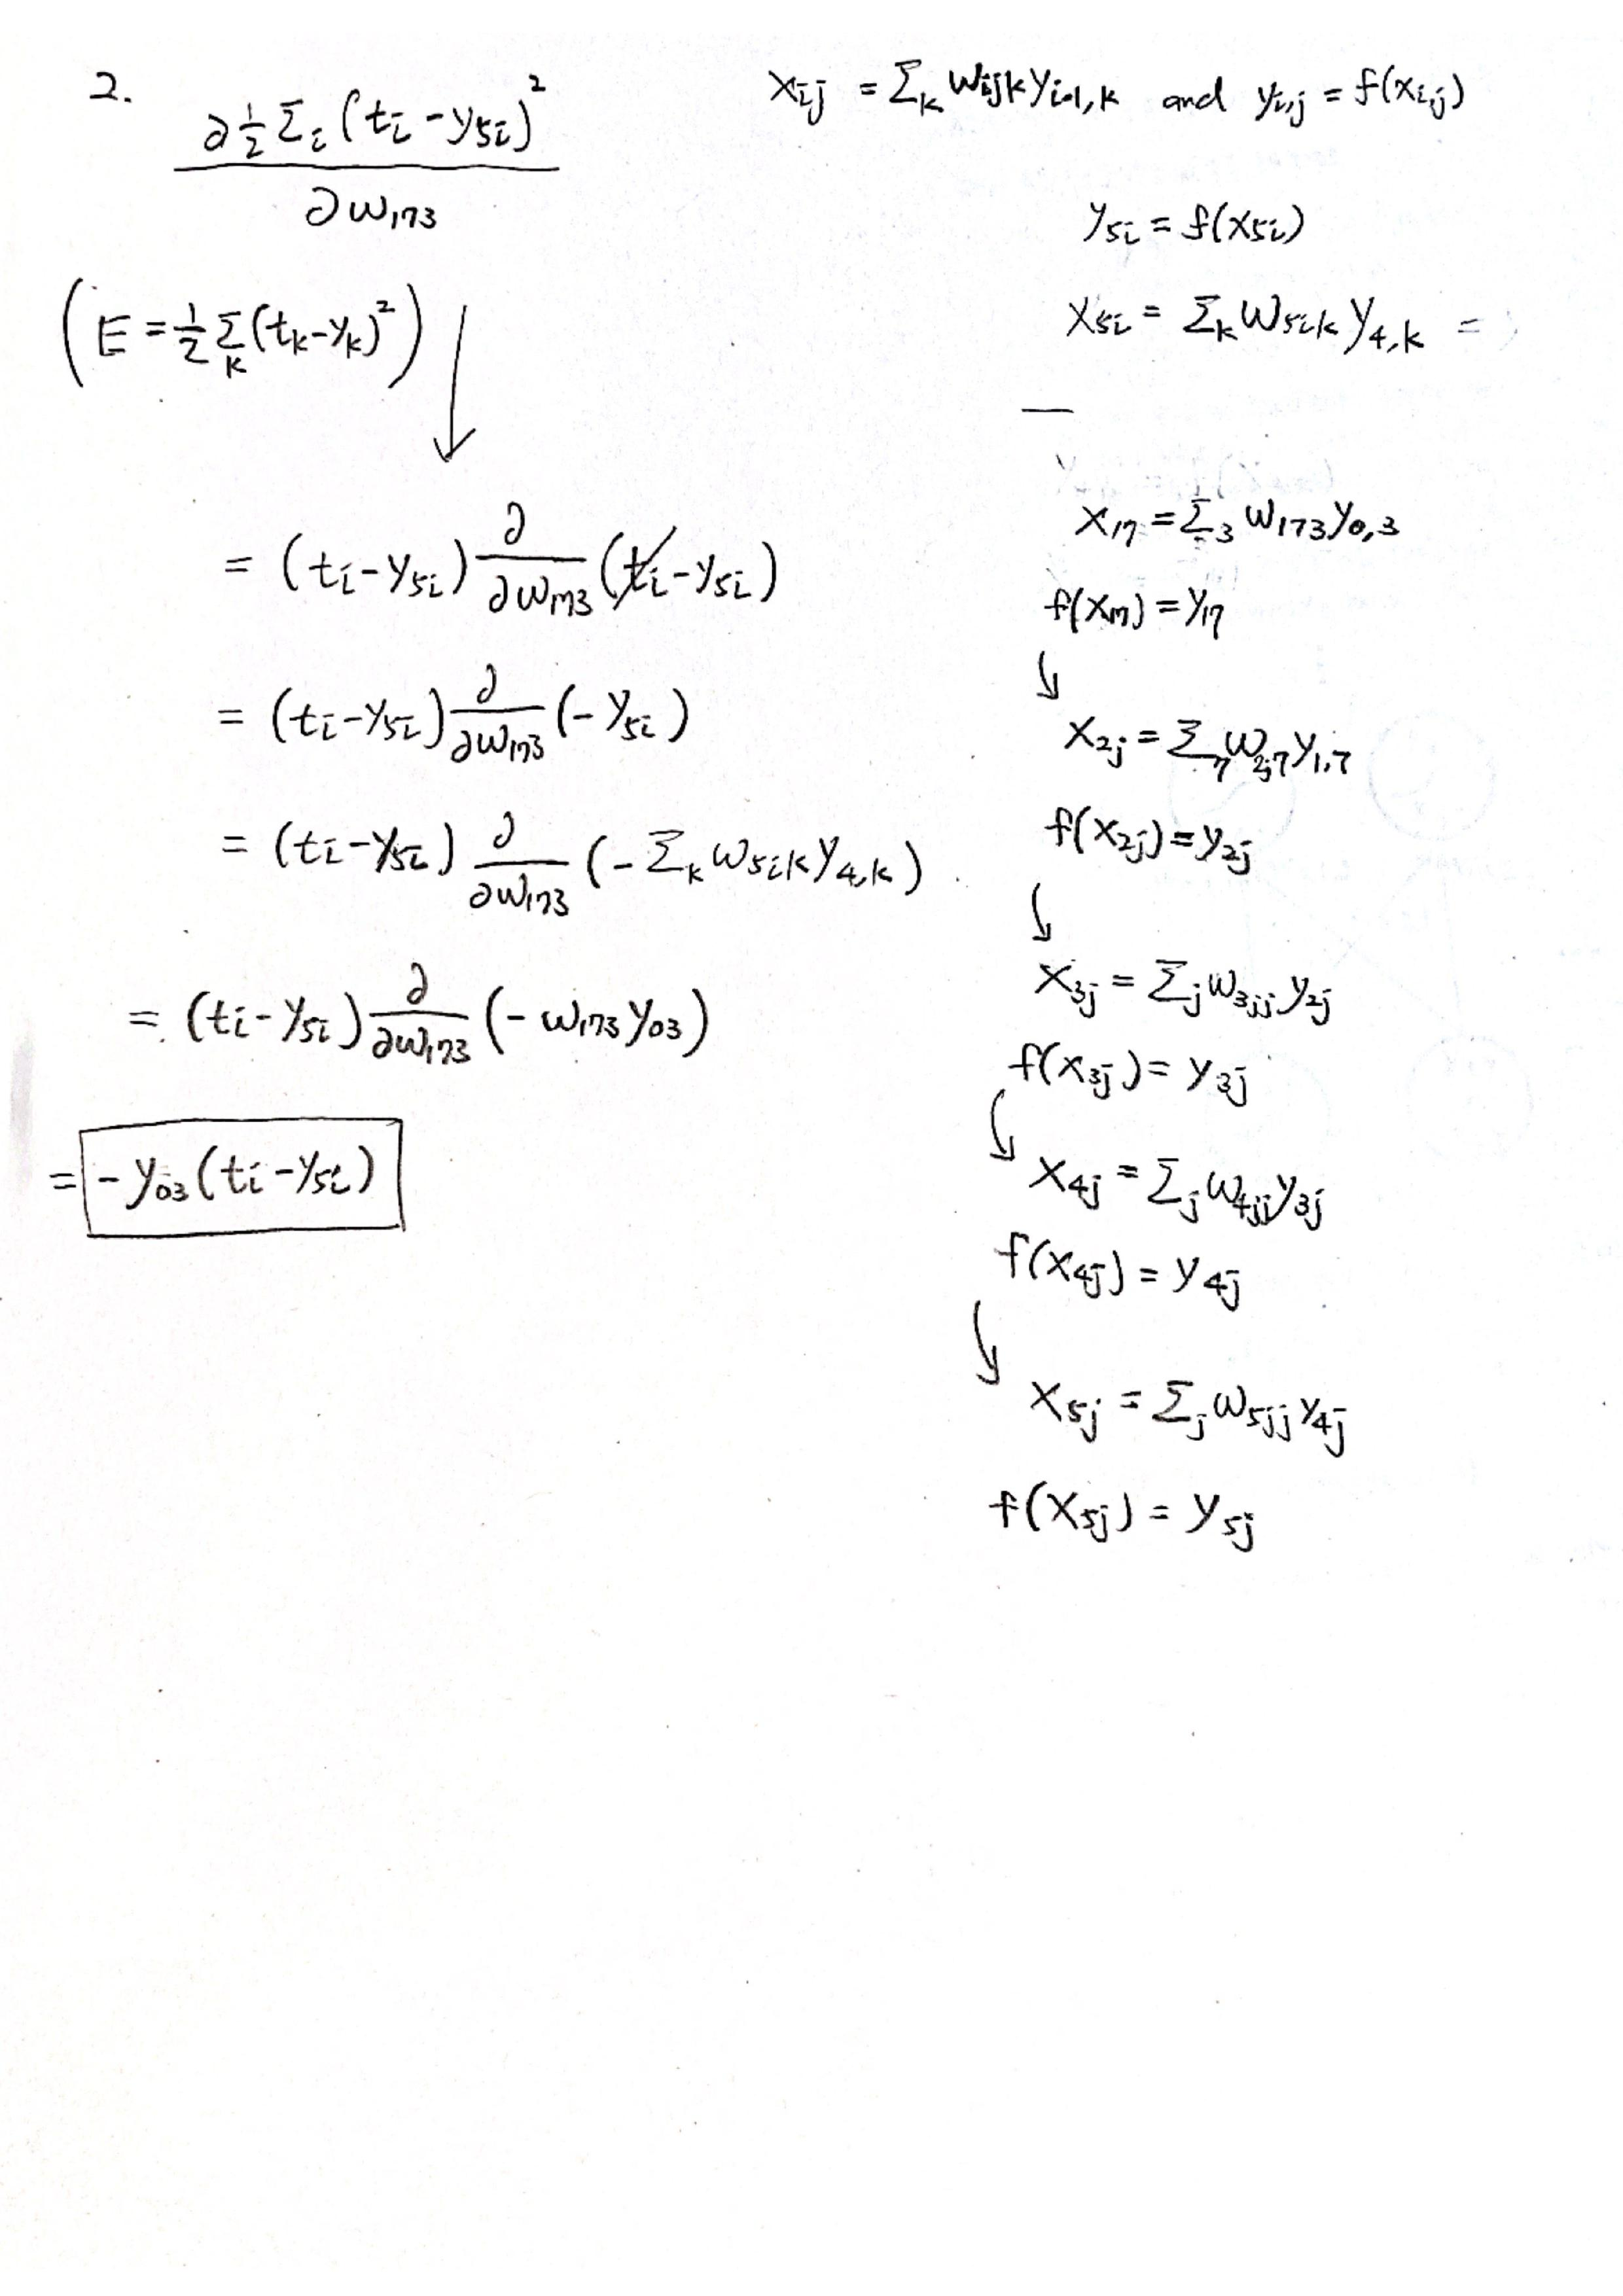

# (Backpropagation)

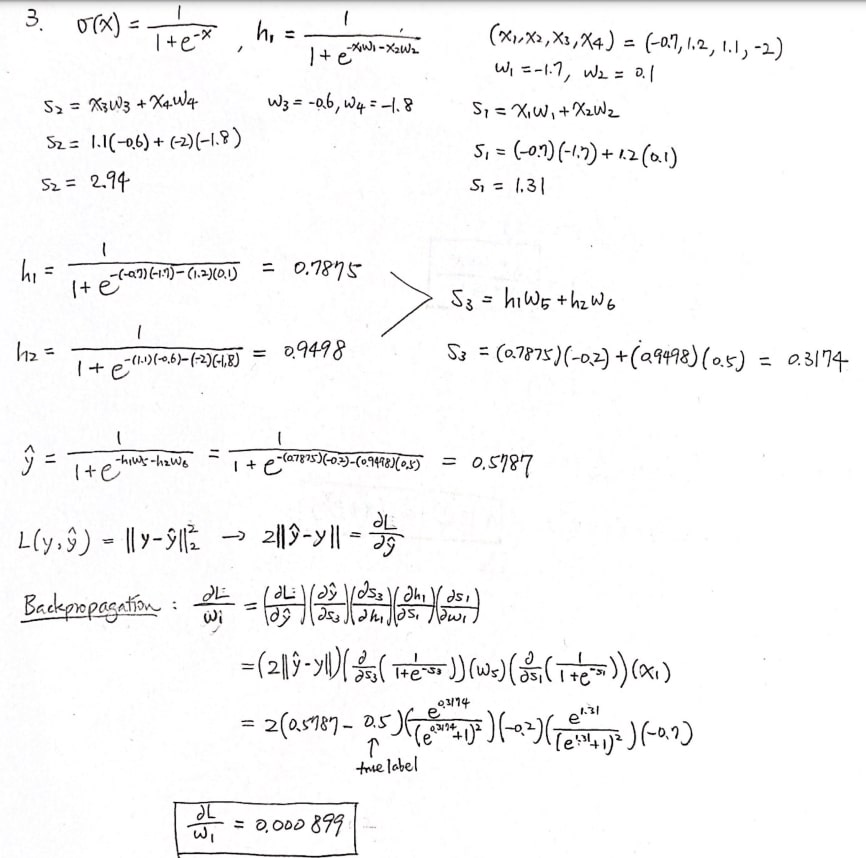

# (Multi-Layer Perceptron Neural Network)

In [303]:
import numpy as np
import pandas as pd

# Load data
data=pd.read_csv('C:\MAE551_HW2_Prob4\HW1_P5_weatherHistory.csv')

data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [319]:
# Import LabelEncoder
from sklearn import preprocessing

# Creating labelEncoder
le = preprocessing.LabelEncoder()


In [334]:
# Spliting data into Feature and
X=data[['Temperature (C)','Apparent Temperature (C)','Wind Speed (km/h)','Wind Bearing (degrees)','Visibility (km)','Loud Cover','Pressure (millibars)']]
y=data['Humidity']

# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)  # 70% training and 30% test


In [362]:
# Import MLPClassifer 
from sklearn.neural_network import MLPClassifier

# Create model object
clf = MLPClassifier(hidden_layer_sizes=(7,6),
                    random_state=4,
                    verbose=True,
                    learning_rate_init=0.005)

# Fit data onto the model
clf.fit(X_train,y_train)

Iteration 1, loss = 6.12442609
Iteration 2, loss = 4.18829593
Iteration 3, loss = 4.15374642
Iteration 4, loss = 4.14354946
Iteration 5, loss = 4.13939558
Iteration 6, loss = 4.13106887
Iteration 7, loss = 4.13774933
Iteration 8, loss = 4.13607749
Iteration 9, loss = 4.13537195
Iteration 10, loss = 4.13499331
Iteration 11, loss = 4.13473820
Iteration 12, loss = 4.13468077
Iteration 13, loss = 4.13446920
Iteration 14, loss = 4.13459399
Iteration 15, loss = 4.13451021
Iteration 16, loss = 4.13450083
Iteration 17, loss = 4.13443382
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPClassifier(hidden_layer_sizes=(7, 6), learning_rate_init=0.005,
              random_state=4, verbose=True)

In [363]:
# Make prediction on test dataset
ypred=clf.predict(X_test)

# Import accuracy score 
from sklearn.metrics import accuracy_score

# Calcuate accuracy
accuracy_score(y_test,ypred)

0.058439314348907936

# (Convolutional Neural Network)

In [2]:
import numpy as np
import pandas as pd 
from keras_preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os
print(os.listdir("C:/MAE551_HW2_Prob5"))


['sampleSubmission.csv', 'test1', 'test1.zip', 'train', 'train.zip']


In [3]:
FAST_RUN = False
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

In [4]:
# Prepare Traning Data

filenames = os.listdir("C:/MAE551_HW2_Prob5/train/train")
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'dog':
        categories.append(1)
    else:
        categories.append(0)

df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

In [5]:
df.head()


,filename,category
0,cat.0.jpg,0
1,cat.1.jpg,0
2,cat.10.jpg,0
3,cat.100.jpg,0
4,cat.1000.jpg,0


In [6]:
df.tail()


,filename,category
24995,dog.9995.jpg,1
24996,dog.9996.jpg,1
24997,dog.9997.jpg,1
24998,dog.9998.jpg,1
24999,dog.9999.jpg,1


<AxesSubplot:>

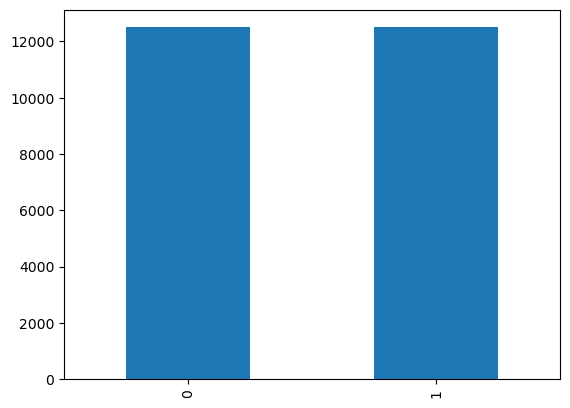

In [7]:
df['category'].value_counts().plot.bar()


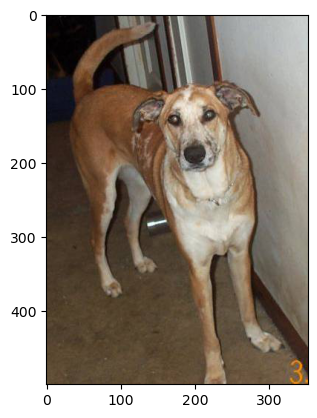

In [8]:
sample = random.choice(filenames)
image = load_img("C:/MAE551_HW2_Prob5/train/train/"+sample)
plt.imshow(image)

In [9]:
# build model

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax')) # 2 because we have cat and dog classes

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 126, 126, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 63, 63, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 61, 61, 64)       2

In [10]:
# callbacks

from keras.callbacks import EarlyStopping, ReduceLROnPlateau

earlystop = EarlyStopping(patience=10)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


In [11]:
# prepare data

df["category"] = df["category"].replace({0: 'cat', 1: 'dog'}) 

train_df, validate_df = train_test_split(df, test_size=0.20, random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)


<AxesSubplot:>

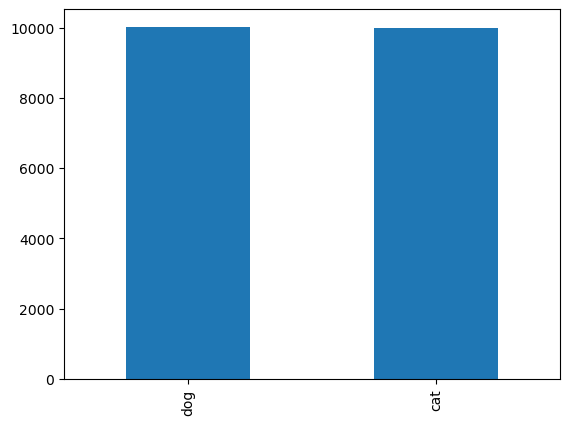

In [12]:
train_df['category'].value_counts().plot.bar()


<AxesSubplot:>

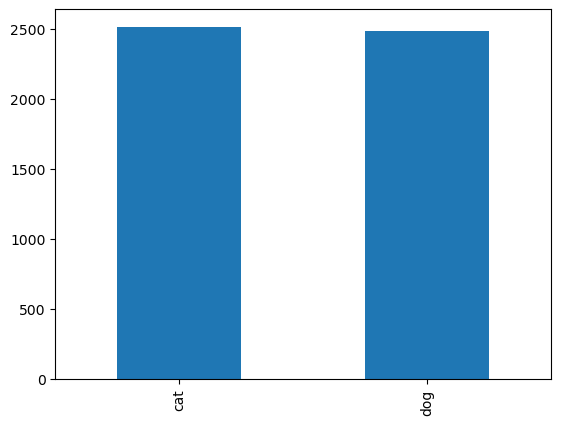

In [13]:
validate_df['category'].value_counts().plot.bar()


In [14]:
total_train = train_df.shape[0]
print("total training data:", total_train)
total_validate = validate_df.shape[0]
print("total validated data:", total_validate)
batch_size = 15

total training data: 20000
total validated data: 5000


In [15]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    "C:/MAE551_HW2_Prob5/train/train/", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 20000 validated image filenames belonging to 2 classes.


In [16]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    "C:/MAE551_HW2_Prob5/train/train/", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 5000 validated image filenames belonging to 2 classes.


In [17]:
example_df = train_df.sample(n=1).reset_index(drop=True)
example_generator = train_datagen.flow_from_dataframe(
    example_df, 
    "C:/MAE551_HW2_Prob5/train/train/", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical'
)

Found 1 validated image filenames belonging to 1 classes.


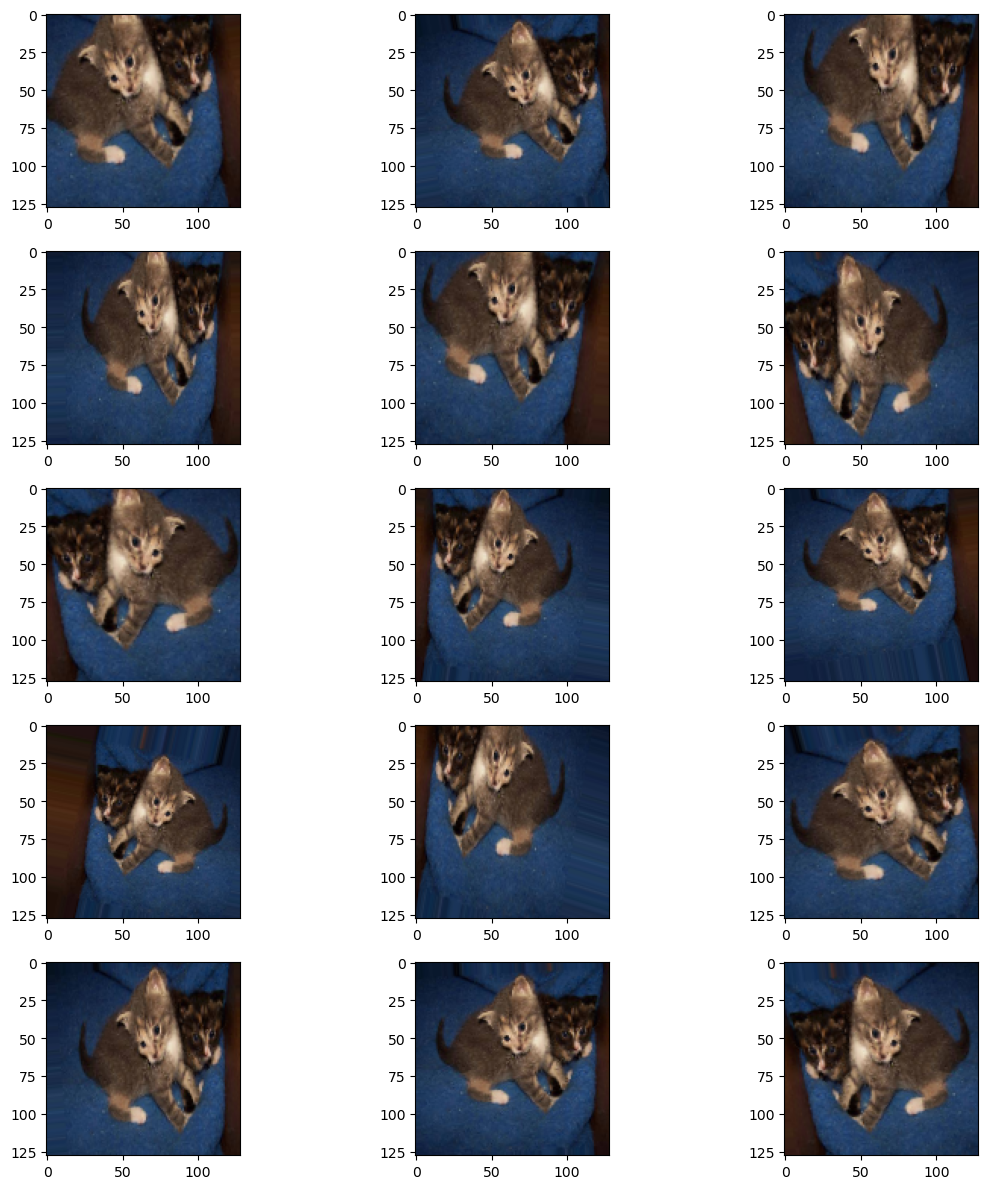

In [18]:
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

In [19]:
# fit model

epochs=3 if FAST_RUN else 50
history = model.fit_generator(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)

C:\Users\Hsiao-ping.ni\Anaconda3\envs\my_env\lib\site-packages\ipykernel_launcher.py:10: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  # Remove the CWD from sys.path while we load stuff.


Epoch 1/50
1333/1333 [==============================] - 613s 459ms/step - loss: 0.7402 - accuracy: 0.6380 - val_loss: 0.6238 - val_accuracy: 0.6945 - lr: 0.0010
Epoch 2/50
1333/1333 [==============================] - 602s 452ms/step - loss: 0.5491 - accuracy: 0.7253 - val_loss: 0.5845 - val_accuracy: 0.7159 - lr: 0.0010
Epoch 3/50
1333/1333 [==============================] - 591s 443ms/step - loss: 0.4968 - accuracy: 0.7640 - val_loss: 0.6008 - val_accuracy: 0.7658 - lr: 0.0010
Epoch 4/50
1333/1333 [==============================] - 661s 496ms/step - loss: 0.4591 - accuracy: 0.7884 - val_loss: 0.3908 - val_accuracy: 0.8258 - lr: 0.0010
Epoch 5/50
1333/1333 [==============================] - 650s 487ms/step - loss: 0.4366 - accuracy: 0.8014 - val_loss: 0.4370 - val_accuracy: 0.7964 - lr: 0.0010
Epoch 6/50
1333/1333 [==============================] - 668s 501ms/step - loss: 0.4155 - accuracy: 0.8124 - val_loss: 0.3524 - val_accuracy: 0.8476 - lr: 0.0010
Epoch 7/50
1333/1333 [============

In [20]:
model.save_weights("model.h5")


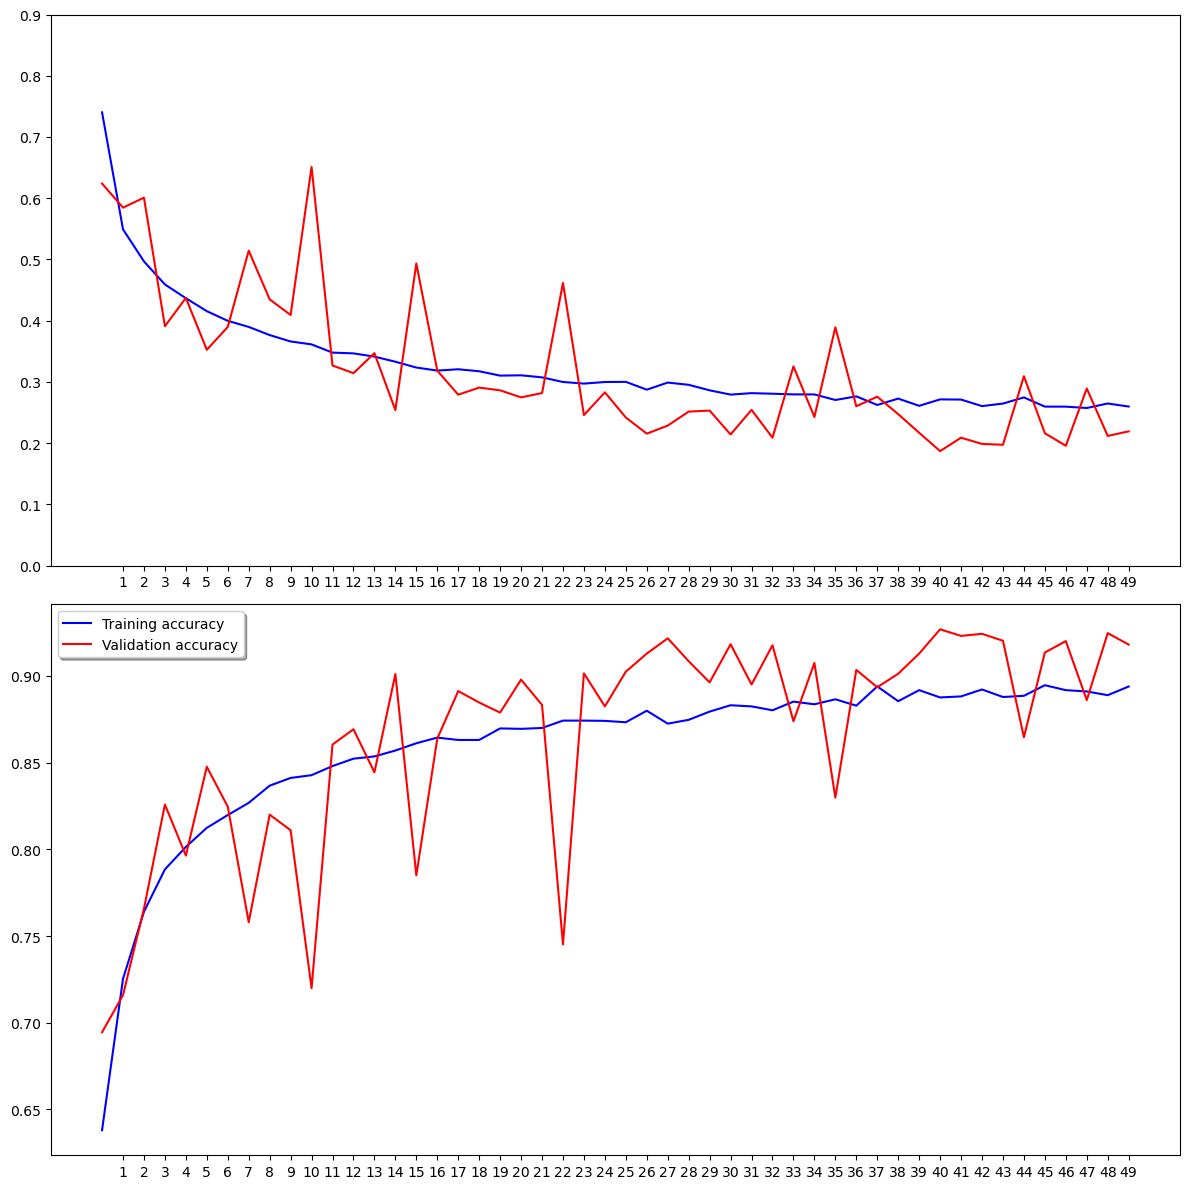

In [39]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

In [24]:
# preparing testing data

test_filenames = os.listdir("C:/MAE551_HW2_Prob5/test1/test1")
test_df = pd.DataFrame({
    'filename': test_filenames
})
nb_samples = test_df.shape[0]

In [25]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df, 
    "C:/MAE551_HW2_Prob5/test1/test1/", 
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=IMAGE_SIZE,
    batch_size=batch_size,
    shuffle=False
)

Found 12500 validated image filenames.


In [26]:
# predict

predict = model.predict_generator(test_generator, steps=np.ceil(nb_samples/batch_size))


C:\Users\Hsiao-ping.ni\Anaconda3\envs\my_env\lib\site-packages\ipykernel_launcher.py:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


In [28]:
test_df['category'] = np.argmax(predict, axis=-1)


In [29]:
label_map = dict((v,k) for k,v in train_generator.class_indices.items())
test_df['category'] = test_df['category'].replace(label_map)

In [30]:
test_df['category'] = test_df['category'].replace({ 'dog': 1, 'cat': 0 })


<AxesSubplot:>

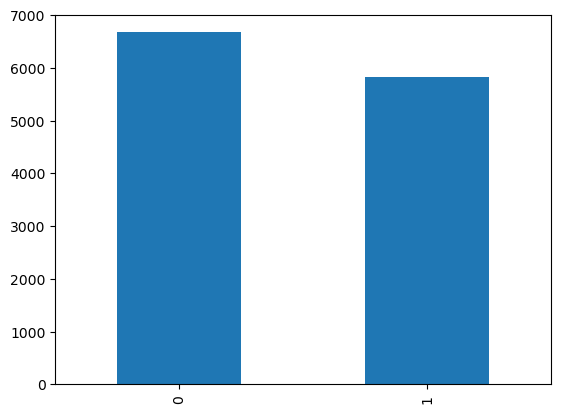

In [34]:
# result

test_df['category'].value_counts().plot.bar()


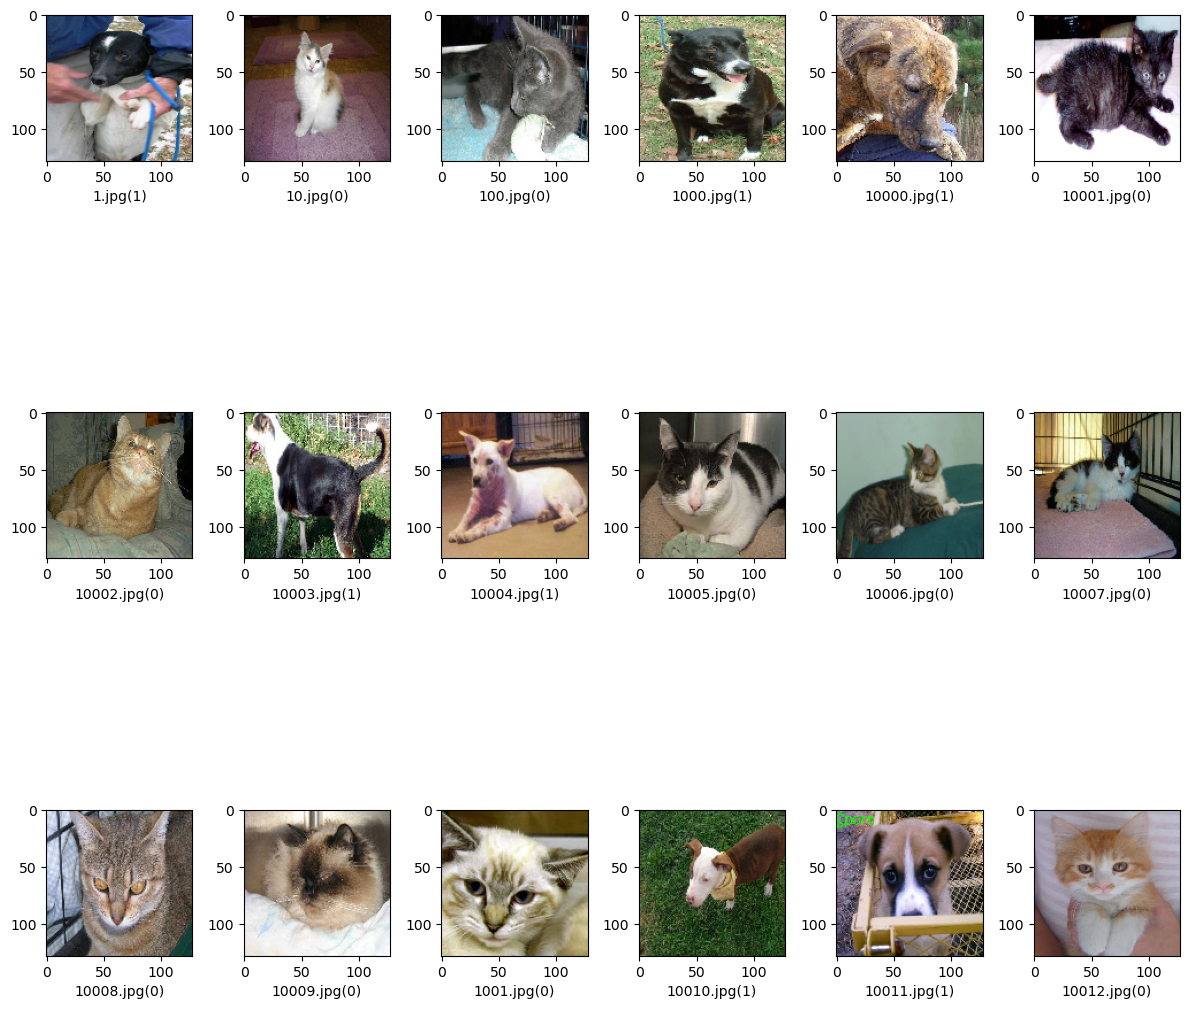

In [37]:
# predicted result with images

sample_test = test_df.head(18)
sample_test.head()
plt.figure(figsize=(12, 24))
for index, row in sample_test.iterrows():
    filename = row['filename']
    category = row['category']
    img = load_img("C:/MAE551_HW2_Prob5/test1/test1/"+filename, target_size=IMAGE_SIZE)
    plt.subplot(6, 6, index+1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')' )
plt.tight_layout()
plt.show()

# (Recurrent Neural Network)

In [214]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os
print(os.listdir("C:\MAE551_HW2_Prob6"))
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error

['HW2_P6_international-airline-passengers.csv', 'HW2_P6_international-airline-passengers_test.csv', 'HW2_P6_international-airline-passengers_train.csv']


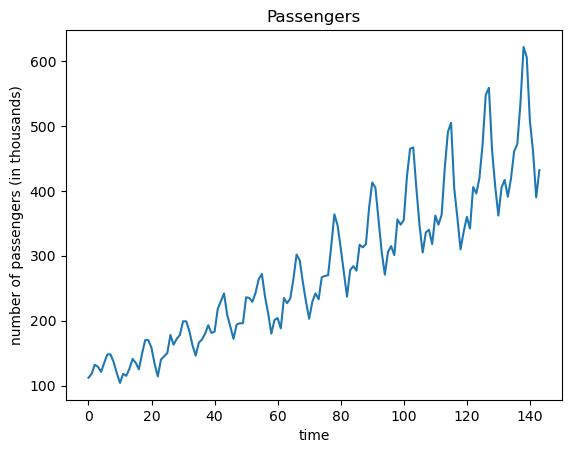

In [216]:
dataset = data.iloc[:, 1].values
plt.plot(dataset)
plt.xlabel('time')
plt.ylabel('number of passengers (in thousands)')
plt.title('Passengers')
plt.show()


In [262]:
#from sklearn.preprocessing import MinMaxScaler

# reshape

#dataset = dataset.reshape(-1,1)
#dataset = dataset.astype('float32')
#dataset.shape


# scaling

#scaler = MinMaxScaler(feature_range= (0,1))
#dataset = scaler.fit_transform(dataset)


In [263]:
# training and testing data

#train_size = int(len(dataset)*0.5)
#test_size = len(dataset)- train_size
#print(test_size)

#train = dataset[0:train_size, :]
#test = dataset[train_size:len(dataset), :]

#print('train size: {}, test size: {}'.format(len(train), len(test)))


### A simple recurrent neural network


In [264]:
train_data = pd.read_csv('C:\MAE551_HW2_Prob6\HW2_P6_international-airline-passengers_train.csv')
train = train_data.loc[:, ['International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60']].values 


In [265]:
from sklearn.preprocessing import MinMaxScaler #bununla, 0-1 arasına scale ettik
scaler = MinMaxScaler(feature_range = (0, 1))
train_scaled = scaler.fit_transform(train)


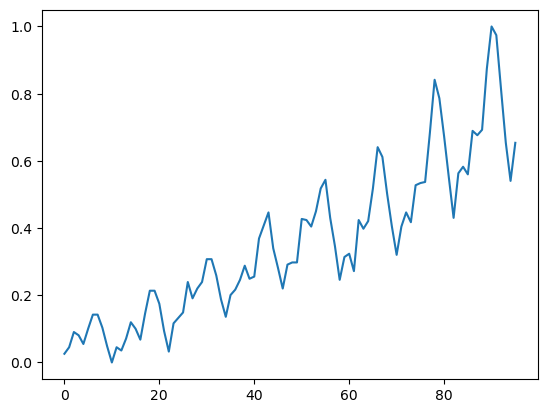

In [266]:
plt.plot(train_scaled)


In [285]:
# data structure

X_train = []
y_train = []
timesteps = 5

for i in range(timesteps, 96):
    X_train.append(train[i - timesteps:i, 0])
    y_train.append(train[i, 0])
    
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


In [295]:
# RNN model

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

#Initialize RNN:
regressor = Sequential()

#Adding the first RNN layer and some Dropout regularization
regressor.add(SimpleRNN(units = 50, activation='tanh', return_sequences=True, input_shape= (X_train.shape[1],1)))
regressor.add(Dropout(0.2))

#Adding the second RNN layer and some Dropout regularization
regressor.add(SimpleRNN(units = 50, activation='tanh', return_sequences=True))
regressor.add(Dropout(0.2))

#Adding the third RNN layer and some Dropout regularization
regressor.add(SimpleRNN(units = 50, activation='tanh', return_sequences=True))
regressor.add(Dropout(0.2))

#Adding the fourth RNN layer and some Dropout regularization
regressor.add(SimpleRNN(units = 50))
regressor.add(Dropout(0.2))

#Adding the output layer
regressor.add(Dense(units = 1))

#Compile the RNN
regressor.compile(optimizer='adam', loss='mean_squared_error')

#Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs=100, batch_size=32)


Epoch 1/100
3/3 [==============================] - 2s 7ms/step - loss: 52182.9961
Epoch 2/100
3/3 [==============================] - 0s 8ms/step - loss: 51528.2305
Epoch 3/100
3/3 [==============================] - 0s 7ms/step - loss: 50822.6094
Epoch 4/100
3/3 [==============================] - 0s 7ms/step - loss: 50518.5703
Epoch 5/100
3/3 [==============================] - 0s 6ms/step - loss: 50113.0938
Epoch 6/100
3/3 [==============================] - 0s 7ms/step - loss: 49793.9766
Epoch 7/100
3/3 [==============================] - 0s 6ms/step - loss: 49621.6758
Epoch 8/100
3/3 [==============================] - 0s 6ms/step - loss: 49383.1875
Epoch 9/100
3/3 [==============================] - 0s 6ms/step - loss: 49144.7656
Epoch 10/100
3/3 [==============================] - 0s 7ms/step - loss: 49014.6523
Epoch 11/100
3/3 [==============================] - 0s 8ms/step - loss: 48923.6523
Epoch 12/100
3/3 [==============================] - 0s 7ms/step - loss: 48812.0156
Epoch 13/100


In [296]:
test = pd.read_csv('C:\MAE551_HW2_Prob6\HW2_P6_international-airline-passengers_test.csv')
real = test.loc[:, ['International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60']].values 


In [300]:
#Getting the predicted stock price
dataset_total = pd.concat((train_data['International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60'], test['International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60']), axis=0)
inputs = dataset_total[len(dataset_total)-len(test) - timesteps:].values.reshape(-1,1)
inputs = scaler.transform(inputs) #minmax scaler



In [301]:
# prediction and visualization of RNN model

X_test = []
for i in range(timesteps, 50):
    X_test.append(inputs[i-timesteps:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted = regressor.predict(X_test)
predicted = scaler.inverse_transform(predicted)
predicted

2/2 [==============================] - 0s 3ms/step


array([[7524.9736],
       [7525.014 ],
       [7525.0303],
       [7525.079 ],
       [7525.113 ],
       [7525.133 ],
       [7525.183 ],
       [7525.2485],
       [7525.2715],
       [7525.227 ],
       [7525.1514],
       [7525.063 ],
       [7525.0537],
       [7525.0815],
       [7525.0815],
       [7525.106 ],
       [7525.119 ],
       [7525.139 ],
       [7525.198 ],
       [7525.2695],
       [7525.299 ],
       [7525.2383],
       [7525.1597],
       [7525.069 ],
       [7525.0605],
       [7525.1025],
       [7525.1206],
       [7525.169 ],
       [7525.19  ],
       [7525.2153],
       [7525.2495],
       [7525.308 ],
       [7525.3296],
       [7525.282 ],
       [7525.216 ],
       [7525.1484],
       [7525.1616],
       [7525.197 ],
       [7525.2   ],
       [7525.205 ],
       [7525.239 ],
       [7525.2666],
       [7525.3022],
       [7525.347 ],
       [7525.354 ]], dtype=float32)

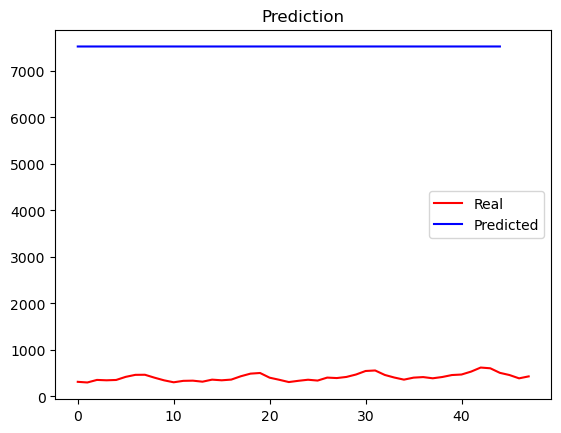

In [302]:
plt.plot(real, color='red', label='Real')
plt.plot(predicted, color='blue', label='Predicted')
plt.title('Prediction')

plt.legend()
plt.show()


### LSTM model

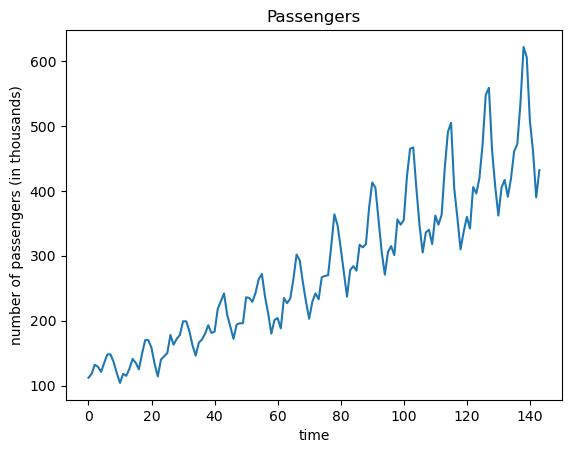

In [198]:
dataset = data.iloc[:, 1].values
plt.plot(dataset)
plt.xlabel('time')
plt.ylabel('number of passengers (in thousands)')
plt.title('Passengers')
plt.show()

In [199]:
dataset = dataset.reshape(-1,1) #(145, ) iken (145,1)e çevirdik
dataset = dataset.astype('float32')
dataset.shape


(144, 1)

In [200]:
scaler = MinMaxScaler(feature_range= (0,1))
dataset = scaler.fit_transform(dataset)

In [201]:
train_size = int(len(dataset)*0.5)
test_size = len(dataset)- train_size

train = dataset[0:train_size, :]
test = dataset[train_size:len(dataset), :]

print('train size: {}, test size: {}'.format(len(train), len(test)))


train size: 72, test size: 72


In [202]:
dataX = []
datay = []
timestemp = 10

for i in range(len(train)- timestemp -1):
    a = train[i:(i+timestemp), 0]
    dataX.append(a)
    datay.append(train[i + timestemp, 0])

    
trainX, trainy = np.array(dataX), np.array(datay)


In [172]:
dataX = []
datay = []
for i in range(len(test)- timestemp -1):
    a = test[i:(i+timestemp), 0]
    dataX.append(a)
    datay.append(test[i + timestemp, 0])

    
testX, testy = np.array(dataX), np.array(datay)


In [173]:
trainX.shape


(61, 10)

In [174]:
trainX = np.reshape(trainX, (trainX.shape[0],1,  trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0],1,  testX.shape[1]))

trainX.shape


(61, 1, 10)

In [175]:
# a LSTM model 

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

model = Sequential()
model.add(LSTM(10, input_shape=(1, timestemp))) # 10 lstm neuron(block)
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainy, epochs=50, batch_size=1)


Epoch 1/50
61/61 [==============================] - 1s 1ms/step - loss: 0.0195
Epoch 2/50
61/61 [==============================] - 0s 1ms/step - loss: 0.0057
Epoch 3/50
61/61 [==============================] - 0s 1ms/step - loss: 0.0044
Epoch 4/50
61/61 [==============================] - 0s 1ms/step - loss: 0.0042
Epoch 5/50
61/61 [==============================] - 0s 1ms/step - loss: 0.0039
Epoch 6/50
61/61 [==============================] - 0s 2ms/step - loss: 0.0038
Epoch 7/50
61/61 [==============================] - 0s 1ms/step - loss: 0.0035
Epoch 8/50
61/61 [==============================] - 0s 1ms/step - loss: 0.0034
Epoch 9/50
61/61 [==============================] - 0s 1ms/step - loss: 0.0034
Epoch 10/50
61/61 [==============================] - 0s 2ms/step - loss: 0.0032
Epoch 11/50
61/61 [==============================] - 0s 2ms/step - loss: 0.0031
Epoch 12/50
61/61 [==============================] - 0s 1ms/step - loss: 0.0030
Epoch 13/50
61/61 [==============================

In [176]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainy = scaler.inverse_transform([trainy])
testPredict = scaler.inverse_transform(testPredict)
testy = scaler.inverse_transform([testy])

import math
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainy[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testy[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))


2/2 [==============================] - 0s 2ms/step
Train Score: 18.68 RMSE
Test Score: 41.23 RMSE


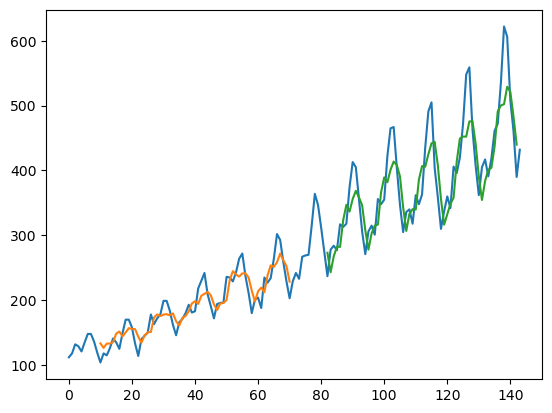

In [177]:
# shifting train
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[timestemp:len(trainPredict)+timestemp, :] = trainPredict

# shifting test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(timestemp*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()
